In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive,widgets

file_path = 'banana.ldt'
column_names = ['x1','x2'] 
# Read into a DataFrame
cord = pd.read_csv(file_path, sep='  ', names=column_names, skiprows=1,usecols=[0,1],engine = 'python')
x1 = np.array(cord.x1)
x2 = np.array(cord.x2)
# Data confirmation (x1,x2)
print(cord)

           x1        x2
0    0.195862  1.270151
1    1.378727  0.131296
2    1.252930 -0.321992
3    1.331717 -0.080226
4    0.408563  1.445537
..        ...       ...
395  0.703955 -0.905775
396  0.334583  1.394056
397 -1.701716 -0.569091
398  2.642809  1.144779
399 -0.254568 -0.141992

[400 rows x 2 columns]


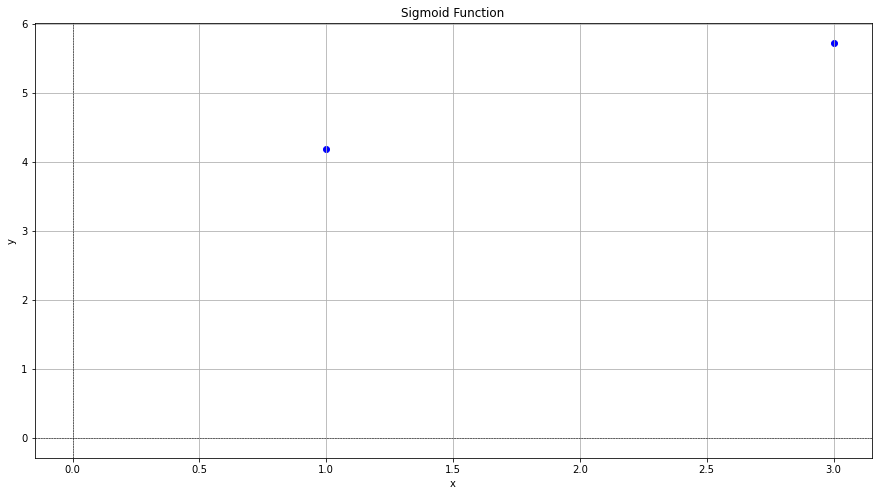

In [31]:
# CALCULATIONS
x1 = np.array(cord.x1)
x2 = np.array(cord.x2)

def Euclidean(x,y):
    base1 = x[1]
    base2 = y[1]
    X = [base1 - value for index, value in enumerate(x) if index != 1]
    Y = [base2 - value for index, value in enumerate(y) if index != 1]
    X = np.array(X)**2
    Y = np.array(Y)**2
    Dist = [np.sqrt(a+b) for a,b in zip(X ,Y)]
    return Dist
def Manhattan(x,y):
    base1 = x[1]
    base2 = y[1]
    X = [base1 - value for index, value in enumerate(x) if index != 1]
    Y = [base2 - value for index, value in enumerate(y) if index != 1]
    X = np.array(X)
    Y = np.array(Y)
    Dist = [(np.absolute(a)+np.absolute(b)) for a,b in zip(X ,Y)]
    return Dist
EU = Euclidean(x1,x2)
MAN = Manhattan(x1,x2)
DIFF = [np.absolute(a-b) for a,b in zip(EU,MAN) ]
Result = pd.DataFrame({'Manhattan': MAN,'Euclidean': EU})
def plot(X,l):
    x=np.linspace(1,l,l-1)
    plt.figure(figsize=(15, 8))
    plt.scatter(x,X,color='blue')
    #plt.scatter(x,Y,color='red')
    plt.title('Sigmoid Function')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
A = max(DIFF)
ind = DIFF.index(A)
A = [EU[269],MAN[269]]
plot(A,3)
#print(ind)

In [32]:
Result.Manhattan.to_csv('Manhattan.csv', index=False,header=False)
Result.Euclidean.to_csv('Euclidean.csv', index=False,header=False)
